# CPT example: planning dual-Doppler campaign
### Nikola Vasiljevic, August 28th 2019

In this example we will use [CPT](https://www.wind-energ-sci-discuss.net/wes-2019-13/) to plan a fictive measurement campaign for a site consisting of 36x78 m turbines.
<br>The site is located in Italy.

It is assumed that you have CPT installed if not use following link for details on the CPT installation:
<br>https://github.com/niva83/campaign-planning-tool
<br>The first thing we need to do is to import CPT and numpy libraries by executing following lines of code:

In [1]:
from campaign_planning_tool import CPT
import numpy as np

If everything when well you have access to a number of methods (i.e., functions) and attributes (i.e., data) of CPT class. At any time you want to have an overview of the CPT class you can execute command:
```
help(CPT)
```
Don't get overwhelmed with a long list of methods and attributes, nevertheless lidar experts will notice some familiar terms. We will slowely go through the process of using important methods in the campaign planning process, while some of the data (attributes set as constants) we will modify for the purpose of demonstrating how CPT library is quite adaptable for your use-case.

In [2]:
#help(CPT)

In [3]:
help(CPT.set_utm_zone)

Help on function set_utm_zone in module campaign_planning_tool._generate_layers:

set_utm_zone(self, utm_zone)
    Sets EPSG code, latitudinal and longitudinal zones to the CPT instance. 
    
    Parameters
    ----------
    utm_zone : str
        A string representing an UTM grid zone, containing digits (1 to 60) 
        indicating the longitudinal zone followed by a character (from 'C' 
        to 'X' excluding 'O') corresponding to the latitudinal zone.



Let us start by creating a CPT object:

In [4]:
layout = CPT()

Before we proceed adding the measurement points it important to know that the CPT methods perform calculation in UTM coordinate system (i.e., positions provided as triplets Easting, Northing and Height). Therefore it is required to set a proper UTM zone to the class, which in our case is 33T. The digits in the UTM zone represent so-called latitudinal zone, while a character represent longitudinal zone. Both, digits and character are required to be provided to the CPT class:

In [5]:
layout.set_utm_zone('33S')

Correct latitudinal zone!
Correct longitudinal zone!
UTM zone set


Now that we have set a proper UTM zone we can add our measurement point to the CPT class.
<br>Let's consider the case where you only have Easting, Northing and turbine hub height:

In [6]:
points = np.array([
[300949.1,4187853.0,78.0],
[300597.1,4187460.0,78.0],
[300351.8,4187435.0,78.0],
[300129.4,4187348.0,78.0],
[299124.5,4187280.0,78.0],
[298878.5,4187224.0,78.0],
[298633.1,4187200.0,78.0],
[298458.2,4187050.0,78.0],
[298116.5,4187089.0,78.0],
[297619.1,4186762.0,78.0],
[297395.2,4186613.0,78.0],
[299878.0,4189082.0,78.0],
[299652.7,4188871.0,78.0],
[299357.0,4188786.0,78.0],
[298882.3,4189383.0,78.0],
[297996.1,4189158.0,78.0],
[297699.7,4189042.0,78.0],
[297381.8,4189050.0,78.0],
[297057.1,4188781.0,78.0],
[299204.8,4191565.0,78.0],
[298736.6,4191423.0,78.0],
[298467.0,4191398.0,78.0],
[297566.1,4193549.0,78.0],
[297270.6,4193464.0,78.0],
[296951.4,4193410.0,78.0],
[296647.4,4192986.0,78.0],
[296427.5,4192991.0,78.0],
[296156.4,4192905.0,78.0],
[295934.9,4192849.0,78.0],
[295713.4,4192793.0,78.0],
[294202.5,4192029.0,78.0],
[293301.6,4191218.0,78.0],
[293073.9,4190916.0,78.0],
[292751.4,4190739.0,78.0],
[292481.7,4190715.0,78.0],
[292214.4,4190783.0,78.0]
])

However, the CPT methods work with the height provided as the height above sea level. 
<br>Therefore, we would need to add terrain height to the turbine hub height. 
<br>The CPT class has method to fetch this information from SRTM database.
<br>Just simply supply UTM zone and numpy array of shapre (n, 3), where n is number of measurement points to the following method:

In [7]:
layout.get_elevation('33S', points)

Correct latitudinal zone!
Correct longitudinal zone!


array([284, 273, 258, 262, 274, 279, 272, 260, 255, 242, 225, 336, 324,
       317, 300, 284, 262, 252, 255, 259, 282, 305, 262, 211, 214, 263,
       286, 312, 298, 286, 166, 192, 183, 174, 153, 155])

The output of this method is terrain height given in meters above the sea level for turbine positions.
Also, you will notice that the method first checks whether the provided UTM zone is correct.
Now lets add these information to our point array and added the modified point array to the class:

In [8]:
points[:, 2] = points[:, 2] + layout.get_elevation('33S', points)
layout.add_measurement_instances('initial', points)

Correct latitudinal zone!
Correct longitudinal zone!
Measurement points 'initial' added to the measurements dictionary!
Measurements dictionary contains 1 different measurement type(s).


With the last code line we used the CPT class method 'add_measurement_instances'.<br>
This method requires a string representing the points indentificator followed with an array of measurement points.
<br>The points identificator takes only following values:
* initial
* optimized
* reachable
* misc
<br><br>In reality you will only add measurement points using points id 'initial' or 'misc'. <br> The CPT class will use other two points id for its internal purposes. Nevertheless you can access any of these values by supplying string to the so-called measurement dictionary:

In [9]:
layout.measurements_dictionary['initial']

,Point no.,Easting [m],Northing [m],Height asl [m]
0,1,300949.1,4187853.0,362.0
1,2,300597.1,4187460.0,351.0
2,3,300351.8,4187435.0,336.0
3,4,300129.4,4187348.0,340.0
4,5,299124.5,4187280.0,352.0
5,6,298878.5,4187224.0,357.0
6,7,298633.1,4187200.0,350.0
7,8,298458.2,4187050.0,338.0
8,9,298116.5,4187089.0,333.0
9,10,297619.1,4186762.0,320.0


Since we want to store CPT results we need to set the output path (path must exist) to the class:

In [10]:
layout.set_path('/Users/niva/Desktop/CPT-example', path_type = 'output')

Path /Users/niva/Desktop/CPT-example set for storing CPT outputs


Of course in your case you should change `'/Users/niva/Desktop/CPT-example'` to the folder you have on your computer.
<br>For those operating Windows machines you will need to add 'r' in front of your path, e.g. :<br>
```
layout.set_path(r'C:\TEMP', path_type = 'output')
```
This avoids [known issues with Windows paths](https://medium.com/@ageitgey/python-3-quick-tip-the-easy-way-to-deal-with-file-paths-on-windows-mac-and-linux-11a072b58d5f).<br>
This is also a good moment to provide the path to the CORINE landcover.
You can donwload the landcover data form the [Copernicus web site](https://land.copernicus.eu/pan-european/corine-land-cover/clc-2012). 
<br>The data comes in different formats, however CPT works with landcover data provided in a raster format (GeoTiff), thus you should select the following option from the Copernicus web sit:<br>
*Corine Land Cover - 100 meter 	2012 	Raster 	100m GeoTiff*
You will download a zip file, which contains various files, but you need to point CPT to the tif file, which depending on the landcover data version could have different name. 
At the time of writing this Jupyter notebook has a following name:
<br>**CLC2018_CLC2012_V2018_20.tif**

In [11]:
layout.set_path('/Volumes/Secondary_Drive/work/projects/campaign-planning-tool/data/input/landcover/g100_clc12_V18_5.tif', 
                path_type = 'landcover')

Path /Volumes/Secondary_Drive/work/projects/campaign-planning-tool/data/input/landcover/g100_clc12_V18_5.tif set for landcover data


Before we start generating GIS layers which will help us navigate positioning of two lidars let us change some attributes of the CPT class, specifically expected averaged range of lidars and mesh extent. 
But before we do that let's check the default values for these attributes:

In [12]:
layout.AVERAGE_RANGE

3000

In [13]:
layout.MESH_EXTENT

5000

The values of both attributes are in meters. 
The mesh extent indicates how big area the generated GIS layers will occupy.<br> By default the layers will occupy area of 10x10km at the barycenter of measurement points.<br>The indicated MESH_EXTENT of 5000 m is basically added and substracted from the mesh center coordinates to generate the GIS layer corners.
<br><br>Since the measurement points at the Italian site are quite wide spreaded we need to increase the mesh extent, while increasing the default average range to 4000 m.

In [14]:
layout.MESH_EXTENT = 8000 # in meters
layout.AVERAGE_RANGE = 4000 # in meters

Now lets generate layer for placing first lidar. The method that we need to call is:
<br>`layout.generate_first_lidar_placement_layer(points_id)`
<br> where point_id is a string indicating which measurement points should be used in this process.
<br> We will set *points_id* to *'initial'* since we have previously added measurement points considering this id:

In [15]:
layout.generate_first_lidar_placement_layer('initial')

Generating combined layer for initial measurement points!
Correct latitudinal zone!
Correct longitudinal zone!
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
First lidar placement layer generated with landcover data!


If you want to see the results of this method simply plot them using method: <br>
```
layout.plot_layer(layer_id)
``` 
where layer_id is a string which tells to the method which GIS layer it should plot.  A full list of layer identificators you can find by calling accessing attribute:<br> 
```
layout.LAYER_TYPE
``` 
In our case we are interested in the layer 'first_lidar_placement'.<br>Lets provide some extra information such as title and indicate that we want to save the plot to the plotting method:

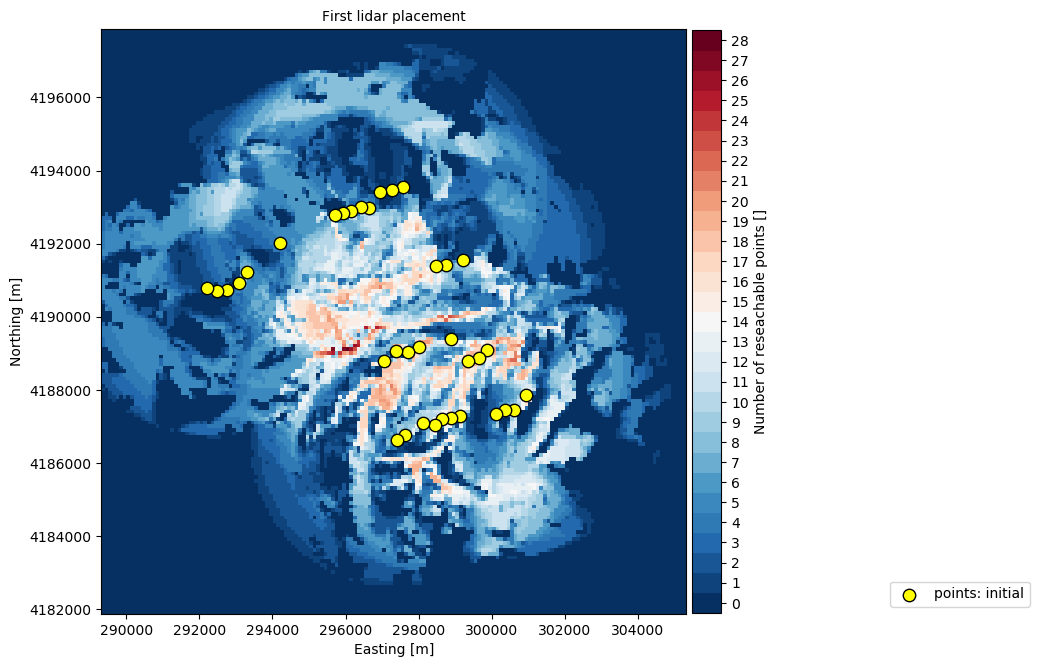

In [16]:
layout.plot_layer('first_lidar_placement', title = 'First lidar placement', save_plot = True)

Unlike the Croatian site example, in this example we have a larger number of turibnes which are clustered and distributed over a much larger area.<br>
Due to this we will run the optimization routine to decrease the number of measurement points: 

Correct latitudinal zone!
Correct longitudinal zone!
Optimizing initial measurement points!
Correct latitudinal zone!
Correct longitudinal zone!
Measurement points 'optimized' added to the measurements dictionary!
Measurements dictionary contains 2 different measurement type(s).


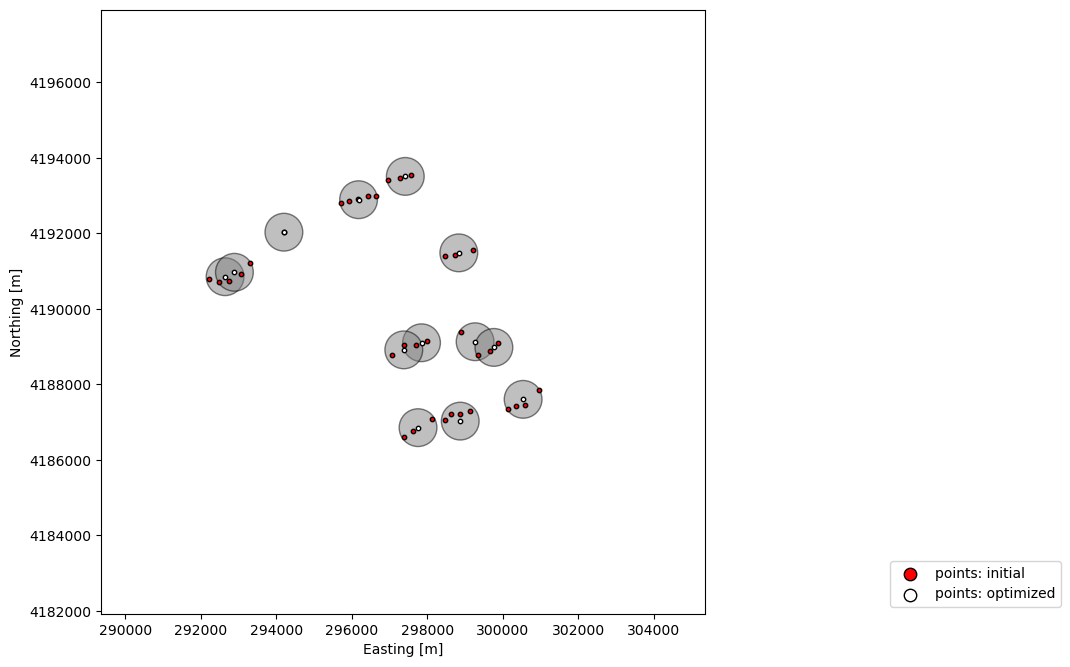

In [17]:
layout.optimize_measurements('initial')
layout.plot_optimization()

Let's see what happend here. First of all we called method: <br>
``` 
layout.optimize_measurements('initial')
```

This method requires string input which indicates what measurement points should be run through the optimization rutine. In our case we have pointed the method to *initial* measurement points. Then method runs a disc covering problem on the set of measurement points (read details about this in [the paper](https://www.wind-energ-sci-discuss.net/wes-2019-13/)). The method derives a minimum number of discs whith radius of 500 m (see *layout.REP_RADIUS*) that cover all the measurement points. Afterwards the disc centers are copied to  *layout.measurements_dictionary* as *optimized* measurement points. You are free to play with the value of the disc radies by changing the attribute *layout.REP_RADIUS*, and then re-runing the optimization with the new configuration. <br>

The second method:<br>
```
layout.plot_optimization()
```
simply plots the results of the optimization, you can see both the position of *initial* and *optimized* measurement points.<br>Let's generate the first lidar placement layer using the optimized measurement points:

Generating combined layer for optimized measurement points!
Correct latitudinal zone!
Correct longitudinal zone!
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
First lidar placement layer generated with landcover data!


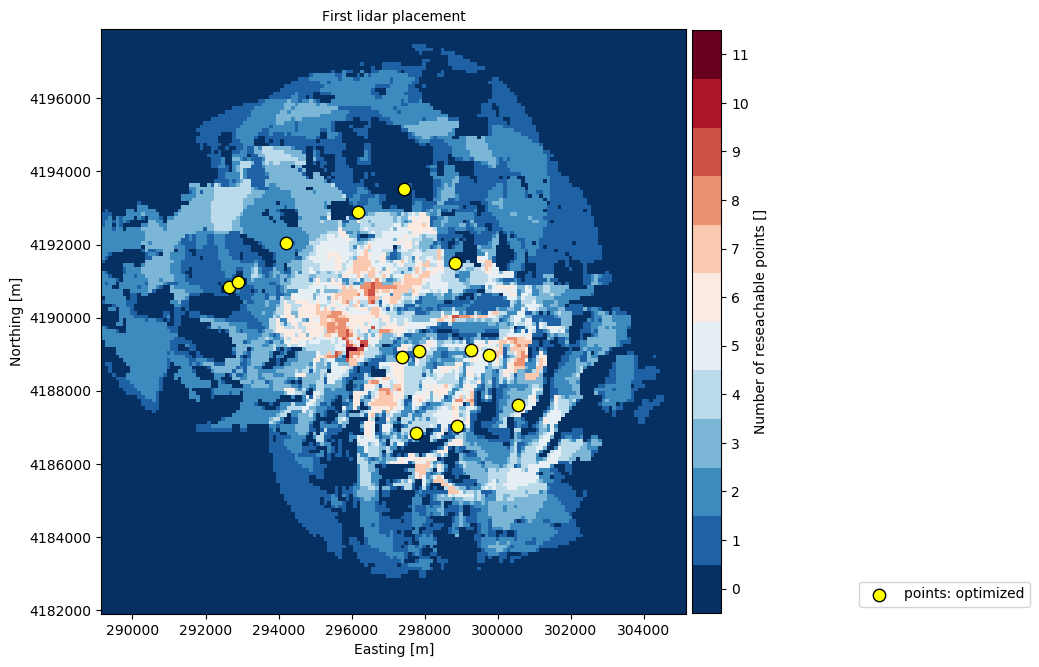

In [18]:
layout.generate_first_lidar_placement_layer('optimized')
layout.plot_layer('first_lidar_placement', title = 'First lidar placement', save_plot = True)

In both cases niether location at the map would allow to reach all measurement points.<br>
The reason for this a combintion of contraints (range and clear LOS) which you can inspect in Google Earth:

In [19]:
layout.export_kml('layer_stack_for_first_lidar', 
                  layer_ids = ['los_blockage','range_contrained','first_lidar_placement'])

KML exported successful!


This time we will use Google Earth to visually find the lidar position.<br> Inspecting the layer *'first_lidar_placement'* a position with coordinates Easting: 295946 Northing: 4189181 Height: 253 looks promising.

Lidar 'koshava' added to the lidar dictionary, which now contains 1 lidar instance(s).
Updating lidar instance 'koshava' considering GIS layer 'first_lidar_placement'.


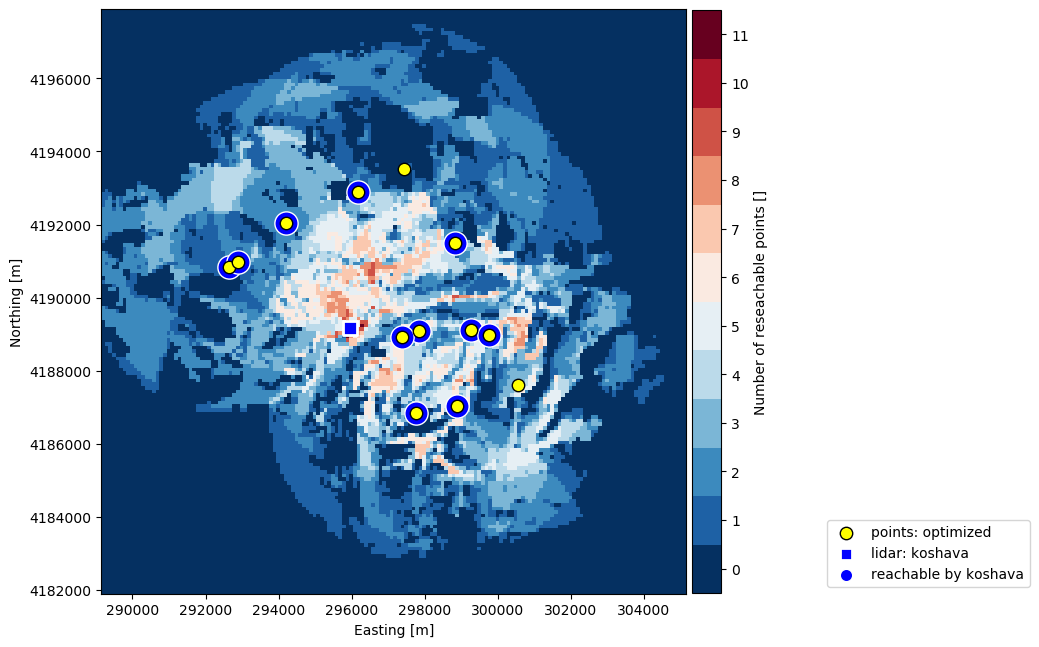

In [20]:
layout.add_lidar_instance('koshava', np.array([295946, 4189181, 253]), layer_id = 'first_lidar_placement')
layout.plot_layer('first_lidar_placement', lidar_ids = ['koshava'])

In [21]:
layout.lidar_dictionary['koshava']['reachable_points']

array([1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.])

As we can see from the plot and also from the dictionary for the given position of the lidar 11 out of 13 measurement points are rechable.

Since we have selected the first lidar position, let's add the second lidar. 
<br>Now we need to add one more contraint that is the minimum intersecting angle between beams.
By calling <br>
```
layout.MIN_INTERSECTING_ANGLE
```
you can see what is the preset value in degrees.<br>
For time being we will use the default value of 30 degrees and create so called <br>*'additional lidar placement layer'*
<br> To do this we will call method <br>
```
layout.generate_additional_lidar_placement_layer(lidar_id)
```
where *lidar_id* will be set to *'koshava'*, since that is the id of our first lidar.

Updating lidar instance 'koshava' considering GIS layer 'first_lidar_placement'.


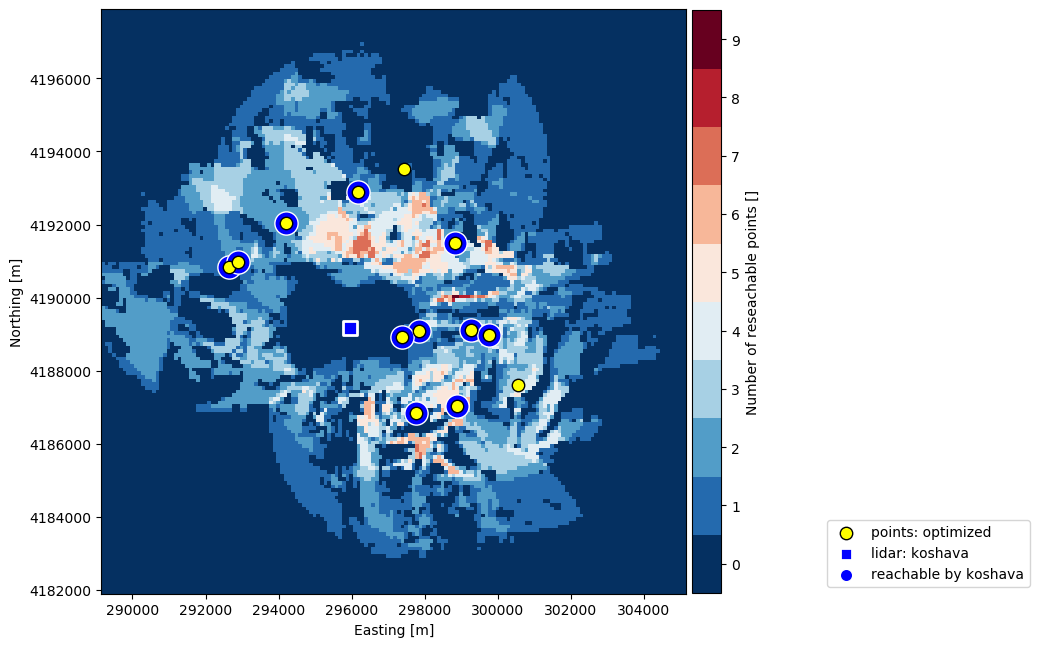

KML exported successful!


In [22]:
layout.generate_additional_lidar_placement_layer('koshava')
layout.plot_layer('additional_lidar_placement', lidar_ids = ['koshava'])

layout.export_kml('layer_stack_for_second_lidar', 
                  layer_ids = ['los_blockage','range_contrained','additional_lidar_placement'])

In the above plot of the new GIS layer you can see that some areas which in the previous plot were indicated as a good areas for lidar installation are removed. The reason for this is that if the second lidar was placed at those areas the intersecting angle between the first and second lidar would be lower than 30 degrees.
<br>
With this new result we can see that where ever you put the second lidar you will not be able to reach more than 9 measurement points. Accordingly we set the treshold for `layout.lidar_position_suggestion()` method to 9:

In [23]:
second_lidar_positions = layout.lidar_position_suggestion('additional_lidar_placement', 9)

Lidar 'bura' added to the lidar dictionary, which now contains 2 lidar instance(s).
Updating lidar instance 'bura' considering GIS layer 'additional_lidar_placement'.


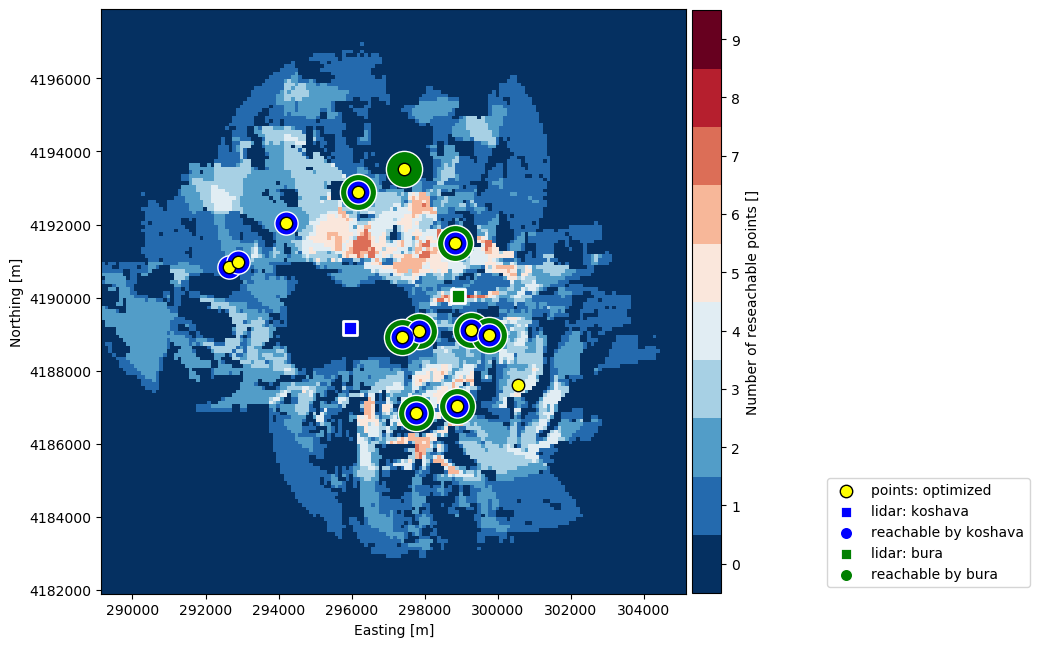

In [24]:
layout.add_lidar_instance('bura', second_lidar_positions[1],layer_id = 'additional_lidar_placement')  
layout.plot_layer('additional_lidar_placement', lidar_ids = ['koshava', 'bura'])

Actually, once we place the second lidar, we are only able to reach 7 out of 13 optimized measurement points.<br> 
For the end let's optimize the trajectory through the commong reachable points for the two lidars and export results:

In [25]:
layout.optimize_trajectory(['koshava', 'bura'], sync = True, only_common_points = True)

Lidar instances:['koshava', 'bura'] will be updated with the optimized trajectory
Synchronizing trajectories for lidar instances:['koshava', 'bura']


In [26]:
layout.lidar_dictionary['koshava']['motion_config']

,Step-stare order,Azimuth [deg],Elevation [deg],Move time [ms]
0,8->1,93.06,2.31,3373.0
1,1->2,90.93,2.21,829.0
2,2->3,126.38,1.53,1210.0
3,3->4,142.16,1.36,877.0
4,4->5,100.66,2.95,1331.0
5,5->6,92.44,2.98,574.0
6,6->7,3.62,2.11,2277.0
7,7->8,51.48,1.41,1458.0


In [27]:
layout.lidar_dictionary['bura']['motion_config']

,Step-stare order,Azimuth [deg],Elevation [deg],Move time [ms]
0,8->1,141.05,4.49,3373.0
1,1->2,158.23,4.73,829.0
2,2->3,180.50,0.97,1210.0
3,3->4,199.70,0.41,877.0
4,4->5,233.27,0.88,1331.0
5,5->6,228.01,2.14,574.0
6,6->7,316.27,1.33,2277.0
7,7->8,357.44,1.79,1458.0


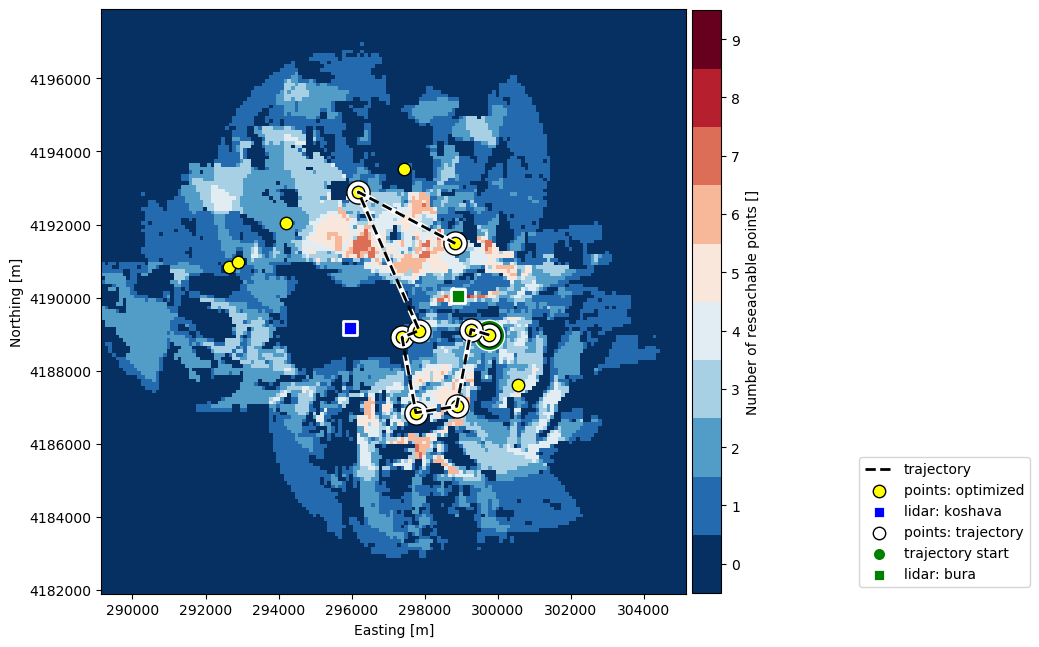

In [28]:
layout.plot_design('additional_lidar_placement', lidar_ids = ['koshava', 'bura'], save_plot = True)

In [29]:
layout.export_measurement_scenario(['koshava', 'bura'])
layout.export_kml('campaign_desing', 
                  layer_ids = ['first_lidar_placement','additional_lidar_placement'],
                  lidar_ids = ['koshava', 'bura'])

Measurement scenario export successful!
KML exported successful!
